# Introduction to Norms

A _norm_ is a function that measures the "size" of something.
One example of a norm is the familiar Euclidean norm, which uses the expression $(x_1^2+x_2^2)^{1/2}$ to compute the "size" or "magnitude" of a point $(x_1,x_2)$ in the two-dimensional Euclidean plane.
If we view that point as a vector, then that is the Euclidean norm of the vector.

So, let's start with vectors and norms of vectors.
(We can have norms for other things, like matrices, functions, etc., but let's start with vectors and norms of vectors.)
In linear algebra, _vectors_ are objects that are used to model data that we will work with frequently; and it is common to consider the norm of a vector.

The Euclidean norm, and its generalization to vectors in $\mathbb{R}^{n}$, is particulalry important for linear algebra and data science.
However, there are other norms, and many of these other norms are also useful.
So, it is important to be familiar with them and their basic properties.
Here, we will introduce and work with different types of norms.

We will talk more later about exactly what vectors are mathematically, but for now and for the sake of computation it is common to think of a vector simply as a array of numbers upon which certain operations can be performed.
In Python, the most convenient way to store a vector is in a numpy array, such as the following:

In [1]:
import numpy as np

x = np.array([1,2,3])
x

array([1, 2, 3])

Observe that we had to `import numpy`.
This imports the `numpy` package, which is a package that supports multi-dimensional arrays and matrices, including high-level mathematical functions to operate on these arrays.
Arrays are superficially similar to lists in base Python, but they come equipped with many additional features which will be useful when performing linear algebraic operations.


## The Euclidean norm

When applied to vectors, a _norm_ function that takes as input a vector and that returns a single non-negative number.
The most common norm is the so-called _Euclidean norm_.
For for a general $n$-dimensional vector $\boldsymbol{x} = (x_1,\dots,x_n)$, the Euclidean is given by

$$
\|\boldsymbol{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}  .
$$

Here, we use the subscript $2$ since the Euclidean norm is sometimes also called the _2-norm_ or the _$\ell_2$-norm_; the reasons for this will become clear shortly.
This formula may seem unfamiliar now, but it is the "obvious" extension of the familiar Euclidean norm to vectors with $n$ components.

If $n=2$, then this is simply the $2$-dimensional example in the plane:
for a point $\boldsymbol{x} = (x_1,x_2)\in \mathbb{R}^2$, the (Euclidean) length of this vector is just

$$
\|\boldsymbol{x}\|_2 = \sqrt{\sum_{i=1}^2 x_i^2} = \sqrt{x_1^2 + x_2^2} .
$$

This can also be seen as a special case of the Pythagorean Theorem: given a right triangle with side lengths $x_1$ and $x_2$, the length of the hypotenuse is given by $\|\boldsymbol{x}\|_2$.

If $n=3$, then this is simply the Euclidean norm of a $3$-dimensional point in three-dimensional Euclidean space, i.e.,

$$
\|\boldsymbol{x}\|_2 = \sqrt{\sum_{i=1}^3 x_i^2}
$$

for a vector $\boldsymbol{x}$ in three-dimensional Euclidean space.
Here, too, there is a similar interpretation in terms of the Pythagorean Theorem.

If $n \ge 4$, then clearly we can sum up the squares of more than three numbers.
The point of writing the Euclidean norm in this suggestive way is not just that the same expression holds for any $n$, even if $n \ge 4$, when it is less easy to visualize these quantities, but also that this expression still gives a norm in those cases.
Also, less obvious but still true, many of the interpretations in terms of angles, perpendicularity, etc., also hold true.

Let's write a Python function using numpy functions to compute the Euclidean $2$-norm by explicitly summing over each of the entries and squaring them.
There are many such functions we could write.
Let's start with the following one.

In [2]:
def euclidean_norm(x):
  result = np.sum(x**2)**(1./2)
  return result

We can check that this gives us the correct results on the vector $\boldsymbol{x} = (1,2,3)$ that we defined earlier:

In [3]:
euclidean_norm(x)

3.7416573867739413

As expected, the result is $\sqrt{1^2 + 2^2 + 3^2} = \sqrt{14} \approx 3.74$.

Let's parse what the function `euclidean_norm` does.
First, this function computes the element-wise square of each entry in the vector $\boldsymbol{x}$, with `x**2`; then it sums over each of these entries, with `np.sum()`; and then it takes the square root of the result by raising the sum to the power $1/2$.
(Note: here we use `1./2` instead of `1/2` to make sure python parses this as a float rather than an integer.)

There is also a special function in numpy which we can use to compute the Euclidean norm.

In [4]:
from numpy.linalg import norm

norm(x)

3.7416573867739413

Below, we will see that the `norm` function takes optional arguments -- including an important one called `ord` -- but with no arguments it computes the Euclidean norm of the input vector.

## The $1$-norm

While the Euclidean norm is probably the most common ways to measure the size of a vector, it is not the only way to do so.
Consider the following, which is known as the _$1$-norm_ (or _$\ell_1$-norm_):
for any vector $\boldsymbol{x}=(x_1,\dots,x_n)$, let

$$
\|\boldsymbol{x}\|_{1} = \sum_{i=1}^n |x_i|
$$

We could write a function to compute the $1$-norm of a vector (and you will be asked to do this as a problem).

For now, let's use the numpy `norm` function, which allows us to compute the $1$-norms of vectors if we provide the correct argument.
For example,

In [5]:
print('The 1-norm of x is %f' % norm(x, ord=1))
print('The 2-norm of x is %f' % norm(x, ord=2))

The 1-norm of x is 6.000000
The 2-norm of x is 3.741657


Here, we used `ord=p` to specify whether we wanted to compute the $1$-norm or the $2$-norm.

The two different norms give us two different numbers, i.e., two different different measures of the size of a vector.

Due to the absolute value, if we change the sign of any of the entries in a vector, the value of its norm does not change.
(This absolute value was not needed for the Euclidean norm, since the square of any real number is non-negative.)
For example, if $\boldsymbol{x}'=(-1,-2,-3)$, then $\boldsymbol{x}'$ always has the same norm as $\boldsymbol{x}$.

In [6]:
x_prime = np.array([-1,-2,-3])

print('The 1-norm of x_prime is %f' % norm(x_prime, ord=1))
print('The 2-norm of x_prime is %f' % norm(x_prime, ord=2))

The 1-norm of x_prime is 6.000000
The 2-norm of x_prime is 3.741657


Before moving onto more general properties of norms, let's introduce one more common and useful norm.


## The $\infty$-norm

The $\infty$-norm (or $\ell_\infty$-norm) of a vector is another useful norm to know about.
For a vector $\boldsymbol{x}=(x_1,\dots,x_n)$ the $\infty$-norm is defined as:

$$
\|\boldsymbol{x}\|_\infty = \max_{i=1,\dots,n}|x_i|  .
$$

That is, the $\infty$-norm is simply the maximum absolute value among the entries of $\boldsymbol{x}$.

We can also provide the right argument to numpy's `norm` function to compute the $\infty$-norm:

In [7]:
print( 'The 1-norm of x is %f' % norm(x, ord=1) )
print( 'The 2-norm of x is %f' % norm(x, ord=2) )
print( 'The infinity-norm of x is %f' % norm(x, ord=np.inf) )

The 1-norm of x is 6.000000
The 2-norm of x is 3.741657
The infinity-norm of x is 3.000000


As expected, the $\infty$-norm of $\boldsymbol{x}$ is just its largest entry in absolute value: $3$.

Why is the $\infty$-norm called the "infinity" norm?
We will get to that below.


## Properties of norms

Norms have several important properties that capture the general notion of "size."  
As an example, we already saw one of them: norms are invariant to sign changes of any one of the vector's entries.

More generally, norms have three important properties.
In fact, these three properties are the defining properties of a norm.
They are what a function needs to satisfy to be called a "norm".

1.  For any $x$, $\|\boldsymbol{x}\| \ge 0$, where $0\in\mathbb{R}$; and $\|\boldsymbol{x}\|=0$ if and only if  $\boldsymbol{x} = 0$, where this $0$ is the all-zeros vector, $0 = (0,\dots,0)$.
    (This is sometimes called being _positive definite_.)
2.  For any scalar $\alpha\in\mathbb{R}$, we have that $\|\alpha \boldsymbol{x}\| = |\alpha|\cdot\|\boldsymbol{x}\|$
    (This is sometimes called being _absolutely homogeneous_ or _absolutely scalable_.)
3.  For any vectors $\boldsymbol{x}, \boldsymbol{y}$, we have $\|\boldsymbol{x}+\boldsymbol{y}\|\leq \|\boldsymbol{x}\|+\|\boldsymbol{y}\|$.
    (This is sometimes called being _subadditive_ or satisfying the _triangle inequality_.)

To make sense of these properties, we need to say what it means to add two vectors and scale vectors.
- For vectors $\boldsymbol{x}=(x_1,\dots,x_n), \boldsymbol{y}=(y_1,\dots,y_n)$, when we write $\boldsymbol{x}+\boldsymbol{y}$ we mean the new vector $(x_1+y_1,\dots, x_n+y_n)$.
- Similarly, if $\alpha\in\mathbb{R}$ is a scalar, then $\alpha \boldsymbol{x} = (\alpha x_1, \dots, \alpha x_n)$.

Both of these operations give us new vectors that also have norms.

Let's use numpy to verify two of these properties.


### Scaling vectors

Let's veryify the scalability of norms by absolute values.
Namely, for any scalar $\alpha \in \mathbb{R}$ and vector $\boldsymbol{x} = (x_1,\dots,x_n)$, we have that $\|\alpha \boldsymbol{x}\| = |\alpha|\cdot \|\boldsymbol{x}\|$.   

To do so, let's define another vector $\boldsymbol{x}$ for this problem.

In [8]:
x = np.array([-3,-2,-1,0,1,2,3])

This vectors $1$-norm is given by $12 = |-3| + |-2| + |-1| + |0| + |1|+|2|+|3|$, as we can verify with code:

In [9]:
norm1_x = norm(x, ord=1)
norm1_x

12.0

Now let's try scaling this vector by the scalar $\alpha_1 = 2$:

In [10]:
alpha1 = 2
alpha1_x = alpha1*x

Now let's compute the norm of the re-scaled version:

In [11]:
norm1_alpha1_x = norm(alpha1_x, ord=1)
norm1_alpha1_x

24.0

As expected, the norm was doubled to $24$.

Now, lets see what happens when we rescale the vector by $\alpha_2 = -2$:

In [12]:
alpha2 = -2
alpha2_x = alpha2*x

norm1_alpha2_x = norm(alpha2_x, ord=1)
norm1_alpha2_x

24.0

We still get the same result!
This is because when we scale a vector by a scalar $\alpha$, the norm is rescaled by the absolute value $|\alpha|$.


### The triangle inequality

Let's verify the triangle inequality.

To do so, let's first define two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$.

In [13]:
x = np.array([-1,2,-3,4,-5])
y = np.array([6,-7,8,-9,10])

In numpy, we can easily add these vectors using the normal `+` operation in Python:

In [14]:
x_plus_y = x+y
x_plus_y

array([ 5, -5,  5, -5,  5])

Now let's compute the norms $\|\boldsymbol{x}\|_2, \|\boldsymbol{y}\|_2$ and $\|\boldsymbol{x}+\boldsymbol{y}\|_2$, and verify that the $2$-norm satisfies the triangle inequality:

In [15]:
norm_x = norm(x, ord=2)
norm_y = norm(y, ord=2)
norm_x_plus_y = norm(x_plus_y, ord=2)

print('The 2-norm of x+y is %f' % norm_x_plus_y)
print('The 2-norm of x plus the norm of y is %f' % (norm_x + norm_y))

The 2-norm of x+y is 11.180340
The 2-norm of x plus the norm of y is 25.582101


Indeed, we see that $\|\boldsymbol{x}+\boldsymbol{y}\|_2$ is smaller than $\|\boldsymbol{x}\|_2 + \|\boldsymbol{y}\|_2$.
This is also true of the other norms we introduced.
For example, we can to the same thing with the $\infty$-norm:

In [16]:
norm_x_inf = norm(x, ord=np.inf)
norm_y_inf = norm(y, ord=np.inf)
norm_x_plus_y_inf = norm(x_plus_y, ord=np.inf)

print('The infinity-norm of x+y is %f' % norm_x_plus_y_inf)
print('The infinity-norm of x plus the infinity-norm of y is %f' % (norm_x_inf + norm_y_inf))

The infinity-norm of x+y is 5.000000
The infinity-norm of x plus the infinity-norm of y is 15.000000


There is also an important _reverse triangle inequality_ which is sometimes useful. It states that for any vectors $\boldsymbol{x},\boldsymbol{y}$ and norm $\|\cdot\|$ we have the following inequality: $\|\boldsymbol{x}-\boldsymbol{y}\|\geq \big| \|\boldsymbol{x}\|-\|\boldsymbol{y}\| \big|$. This is called the 'reverse' triangle inequality because rather than giving an upper bound on the sum/difference of two vectors, it gives us a lower bound. Let's see an example with the 2-norm. We first compute $\boldsymbol{x}-\boldsymbol{y}$:

In [17]:
x_minus_y = x-y
x_minus_y

array([ -7,   9, -11,  13, -15])

Then we can compute $\|\boldsymbol{x}-\boldsymbol{y}\|_2$ and $\big|\|\boldsymbol{x}\|_2-\|\boldsymbol{y}\|_2\big|$:

In [18]:
norm_x = norm(x, ord=2)
norm_y = norm(y, ord=2)
norm_x_minus_y = norm(x_minus_y, ord=2)

print('The 2-norm of x-y is %f' % norm_x_minus_y)
print('The absolute value of 2-norm of x minus the 2-norm of y is %f' % np.abs(norm_x - norm_y))

The 2-norm of x-y is 25.396850
The absolute value of 2-norm of x minus the 2-norm of y is 10.749704


We see that the second quantity is indeed smaller.


## The $p$-norms

While the $\ell_1$ and $\ell_2$ and $\ell_\infty$ norms are the most common ways to measure the size of a vector, they are not the only way to do so.
In fact,
we can generalize the defining expression for these norms for a $\boldsymbol{x}=(x_1,\dots,x_n)$ to any number $p \ge 0$:
for any vector $\boldsymbol{x}=(x_1,\dots,x_n)$, consider the expression given by:

$$
\|\boldsymbol{x}\|_p = \left(\sum_{i=1}^n |x_i|^p\right)^{1/p}
$$

For $ p \in [0,1)$, this expression is _not_ a norm; but
for $ p \in [1,\infty]$, this expression is a norm.

Now we see why we call the Euclidean norm the $2$-norm: it is simply a special case of the $p$-norm when $p=2$.
Similarly, we see why we call the $1$-norm the $1$-norm: it is simply a special case of the $p$-norm when $p=1$.
However, the $\infty$-norm looks different.
Why is it called that?
Let's see.

To do so, let's use the numpy `norm` function, which also lets us compute the $p$-norms of vectors.
For example,

In [19]:
x = np.array([1,2,3])

print('The 1-norm of x is %f' % norm(x, ord=1))
print('The 2-norm of x is %f' % norm(x, ord=2))
print('The 3-norm of x is %f' % norm(x, ord=3))

The 1-norm of x is 6.000000
The 2-norm of x is 3.741657
The 3-norm of x is 3.301927


Here, we used `ord=p` to specify which $p$-norm we wanted to compute.
As we expect, different norms give us different numbers.

Also, as we expect, if we change the sign of any of the entries in a vector, the value of its norm does not change.
For example, if $\boldsymbol{x}'=(-1,-2,-3)$, then $\boldsymbol{x}'$ always has the same norm as $\boldsymbol{x}$.

In [20]:
x_prime = np.array([-1,-2,-3])

print('The 1-norm of x_prime is %f' % norm(x_prime, ord=1))
print('The 2-norm of x_prime is %f' % norm(x_prime, ord=2))
print('The 3-norm of x_prime is %f' % norm(x_prime, ord=3))

The 1-norm of x_prime is 6.000000
The 2-norm of x_prime is 3.741657
The 3-norm of x_prime is 3.301927


Let's get back to the question of why the $\infty$-norm is called the $\infty$-norm.

Let's test this with our vector $\boldsymbol{x}=(1,2,3)$:

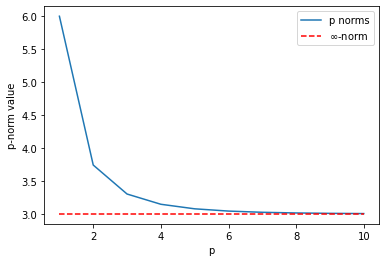

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

p_max = 10
p_range = np.arange(1,p_max+1,1)
norm_values = [norm(x, ord=p) for p in p_range]

plt.plot(p_range, norm_values, label='p norms')
plt.hlines(norm(x, ord=np.inf), xmin=1, xmax=p_max, label=r'$\infty$-norm', color='red', linestyle='--')
plt.xlabel('p')
plt.ylabel('p-norm value')
plt.legend()
plt.show()

As we see, once $p$ gets modestly large, it is essentially just giving us the $\infty$-norm of the vector.

That is, you get this norm by looking at the limit of the $p$-norms as $p\to\infty$!

Notice also that this plot is strictly decreasing: this is due to the following additional property of $p$-norms:

- If $1\leq p<q\leq \infty$, then for any vector $x\in \mathbb{R}^n$, we have that $\|\boldsymbol{x}\|_q \leq \|\boldsymbol{x}\|_p$. In other words, $p$-norms are ordered in 'reverse' order: larger $p$ gives a smaller norm.

Later, we will investigate more properties of norms, and see that they have interesting geometric interpretations.